# Regressão Linear Simples

A **Regressão Linear Simples** é uma técnica estatística usada para modelar a relação entre uma **variável independente (X)** e uma **variável dependente (Y)**. Essa relação é representada por uma linha reta, cujo objetivo é **minimizar os erros (resíduos)** entre os valores previstos e os observados.

## Fórmula da Regressão Linear

A equação da reta pode ser representada de duas formas equivalentes:

- `y = mx + b`
- `Y = β₀ + β₁X + ε`

### Onde:
- `y` ou `Y`: valor da variável dependente
- `x` ou `X`: valor da variável independente
- `m` ou `β₁`: coeficiente angular (inclinação da reta)
- `b` ou `β₀`: coeficiente linear (intercepto da reta no eixo Y)
- `ε`: erro/resíduo, diferença entre o valor observado e o valor previsto

## Método dos Mínimos Quadrados (Ordinary Least Squares - OLS)

O método dos mínimos quadrados busca encontrar os coeficientes `β₀` e `β₁` que **minimizam a soma dos quadrados dos resíduos**, ou seja, a diferença entre os valores reais (`actual y`) e os valores previstos pela reta (`predicted y`).


# Regressão Linear Simples – Projeto

Uma plataforma online de educação, que consegue acompanhar a quantidade de horas que seus alunos passam estudando numa determinada trilha, deseja avaliar se esta quantidade de horas influencia na pontuação do teste final.

Para isso, iremos treinar um **algoritmo de regressão linear**, de forma que seja possível **prever a pontuação do teste final**, dada a **quantidade de horas de estudo**.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Carga dos dados

In [4]:
# abrir o dataset
df_pontuacao = pd.read_csv('./datasets/pontuacao.csv')

In [5]:
# checar estrutura do dataset
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [6]:
# visualizar o topo do df
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [7]:
# visualizar final do dataset
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### EDA

In [8]:
# medidas estatisticas das variaveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

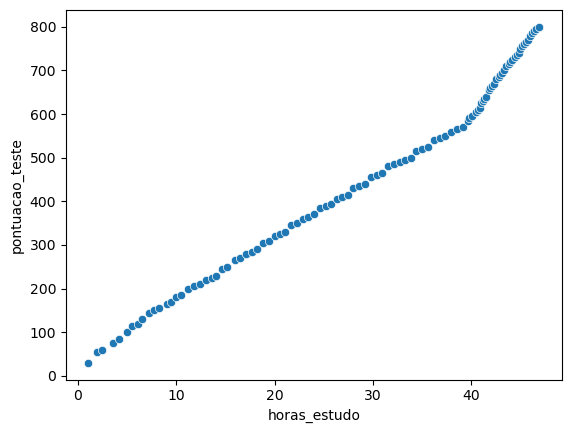

In [9]:
# plot de dispersão
# X = horas estudo
# y = pontuação
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

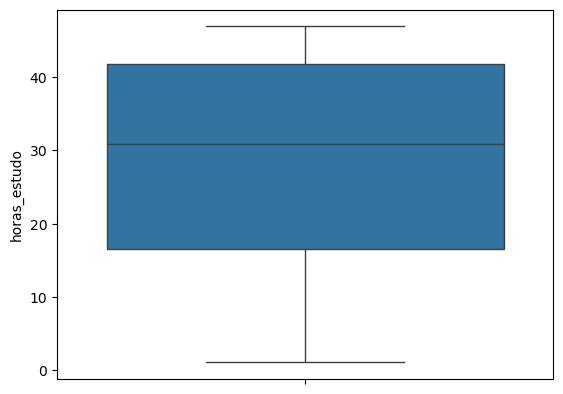

In [10]:
# verificar se temos outliers
# plot boxplot
sns.boxplot(data=df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

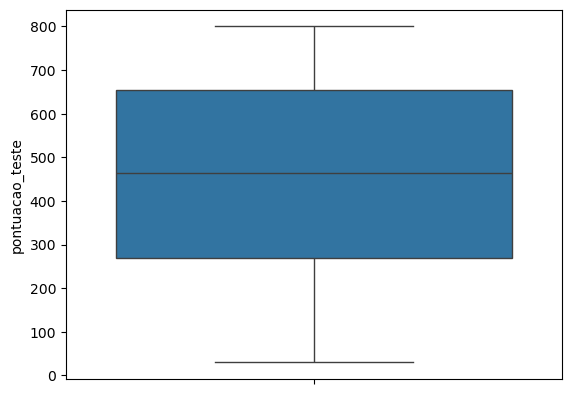

In [11]:
# verificar se temos outliers
# plot boxplot
sns.boxplot(data=df_pontuacao, y='pontuacao_teste')

<Axes: >

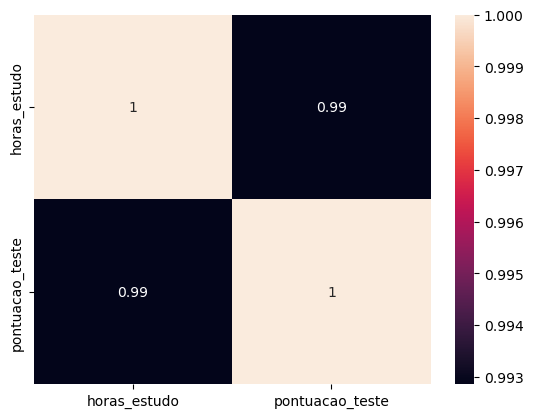

In [12]:
# verificar correlacao - pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

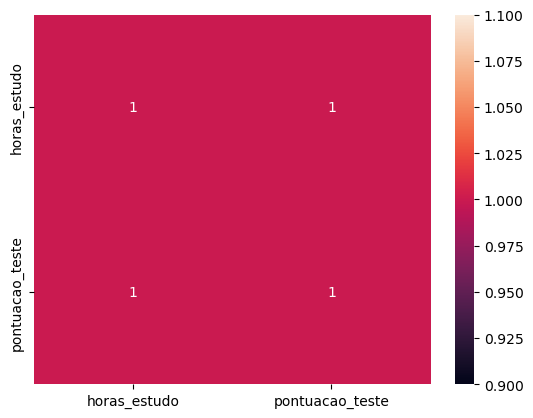

In [13]:
# verificar correlacao - spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

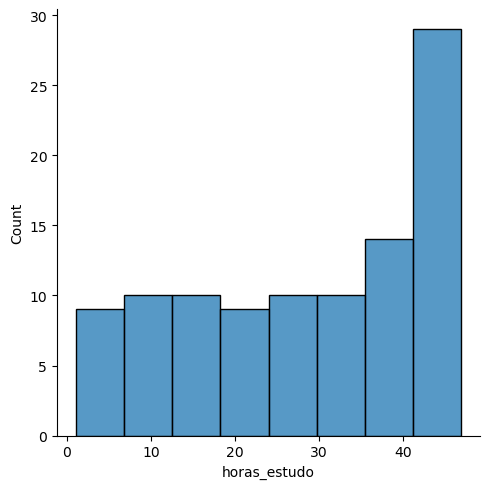

In [14]:
# histograma das variaveis
sns.displot(df_pontuacao, x='horas_estudo')

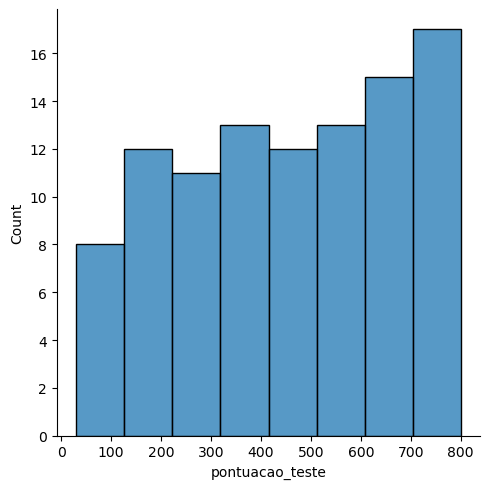

In [15]:
# historgrama das variaveis
sns.displot(df_pontuacao, x='pontuacao_teste')

### Treinar Modelo

In [16]:
# dividir o dataset em treino e teste
# quando temos apenas uma feature, precisamos ajustar o shape
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [17]:
# instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [18]:
# treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [19]:
# imprimir a equação da reta
# y = ax + b
print('A equação da reta é y = {:4f}x + {:4f}'.format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é y = 15.642619x + 8.476601


### Validar Modelo - Métricas

In [20]:
# predicao dos valores com base no conjunto de teste
y_pred = reg_model.predict(X_test)

In [21]:
# calcular metrica R-squared ou coeficiente de determinacao
# R2 representa a proporção na variação da variável dependente que é explicada pela variável independente
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred)

0.9828400452912442

In [22]:
# calcular metrica MAE (Mean Absolute Error)
# MAE = Media (y_test - y_pred)
# é uma metrica facil de interpretar
# MAE é menos sentitivo a outliers
mean_absolute_error(y_test, y_pred)

22.957470277134608

In [23]:
# calcular metrica MSE (Mean Squared Error)
# MSE = Media ((y_test - y_pred)^2)
# Não é uma métrica fácil de interpretar
# MSE é mais sensível a outliers
mean_squared_error(y_test, y_pred)

766.9972992416427

In [24]:
# calcular metrica RMSE - Root Mean Squared Error
# RMSE = Raiz(MSE)
# RMSE é mais fácil de interpretar que o MSE
# RMSE é mais sensível a outliers
mean_squared_error(y_test, y_pred, squared=False)

TypeError: got an unexpected keyword argument 'squared'

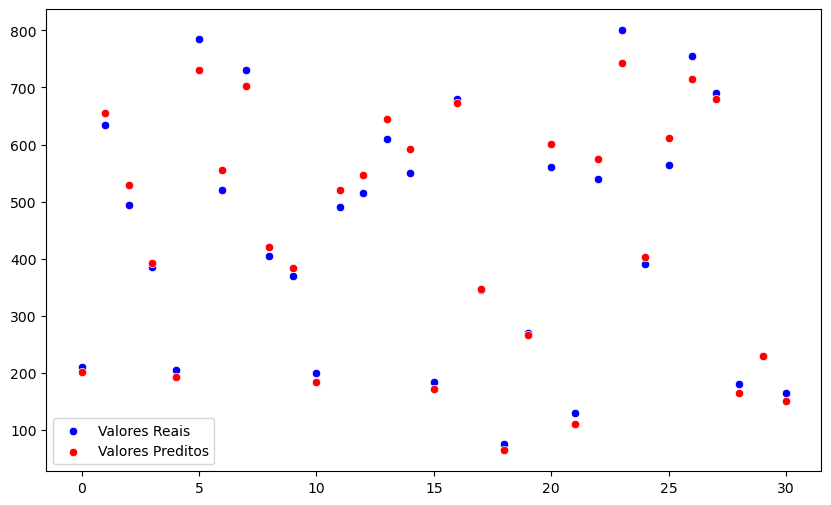

In [25]:
# analise grafica
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.show()

### Análise de Resíduos

In [26]:
# calcular residuos
residuos = y_test - y_pred

In [27]:
# calcular os residuos padronizados (standardization)
# para cada elemento de um conjunto (x - media) / desvio padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

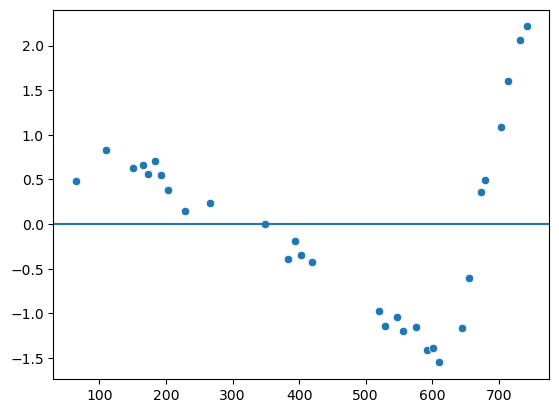

In [28]:
# verificar linearidade do modelo
# se os residuos estiverem entre -2 e +2 (na escala padrao) - indica linearidade

# verificar a homogeneidade das variancias (homoscedasticidade)
# valores estiver em torno da reta, temos homocedasticidade, caso contrario
# se tivermos alguma tendencia ou padrao (formam um cone, funil), ha heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

In [33]:
# checar se residuo segue uma distribuicao normal
# QQ (Quantile-Quantile) plot, que avalia se uma amostra segue uma distribuicao normal

import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Residuos na escala padrao')
plt.show()

ModuleNotFoundError: No module named 'pingouin'

In [34]:
# teste de normalidade - shapiro-wilk
# H0: os residuos seguem uma distribuicao normal
# H1: os residuos nao seguem uma distribuicao normal
# p-value > 0.05, nao rejeita H0, caso contrario rejeita H0
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print('Estatistica de teste: {} e P-valor: {}'.format(stat_shapiro, p_valor_shapiro))

Estatistica de teste: 0.9500532226161753 e P-valor: 0.15663817850304346


In [36]:
# teste de normalidade - kolmogorov-smirnov
# H0: os residuos seguem uma distribuicao normal
# H1: os residuos nao seguem uma distribuicao normal
# p-value > 0.05, nao rejeita H0, caso contrario rejeita H0
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print('Estatistica de teste: {} e P-valor: {}'.format(stat_ks, p_valor_ks))

Estatistica de teste: 0.48355808450512827 e P-valor: 3.395368995814077e-07


### Fazer predições com o modelo

In [37]:
# se eu estudar 30.4 horas, qual a pontuacao esperada?
reg_model.predict([[30.4]])

array([[484.01220436]])

In [41]:
# quantas horas estudar para obter 600 pontos (pelo modelo)?
# y = ax + b
# y - b = ax
# x = (y - b) / a
# x = (600 - b) / a
# b = reg_model.intercept_[0]
# a = reg_model.coef_[0][0]
(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

np.float64(37.81485802710669)

## Salvar modelo para usar depois

In [42]:
import joblib
joblib.dump(reg_model, './modelo_regressao.pkl')

['./modelo_regressao.pkl']